<a href="https://colab.research.google.com/github/linhkid/gdg-codelab-25/blob/main/multiagent/GDG_Gemma2_0_multiagent_funccall_vertex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codelab: Build your first agentic AI with Gemma 2.0 and Vertex AI

Welcome to this **Codelab**, where you'll learn how to build your **first agentic AI** using **Gemma 2.0** and **Vertex AI**.  

In this hands-on guide, you'll explore:  
✅ The fundamentals of **agentic AI**  
✅ How **Gemma 2.0** enhances AI capabilities  
✅ Using **Vertex AI** for seamless model integration  
✅ Step-by-step implementation to build your AI  

By the end, you'll have a working AI agent and a solid understanding of the core concepts.
Let's dive in! 🔥  

# What is Gemma ?
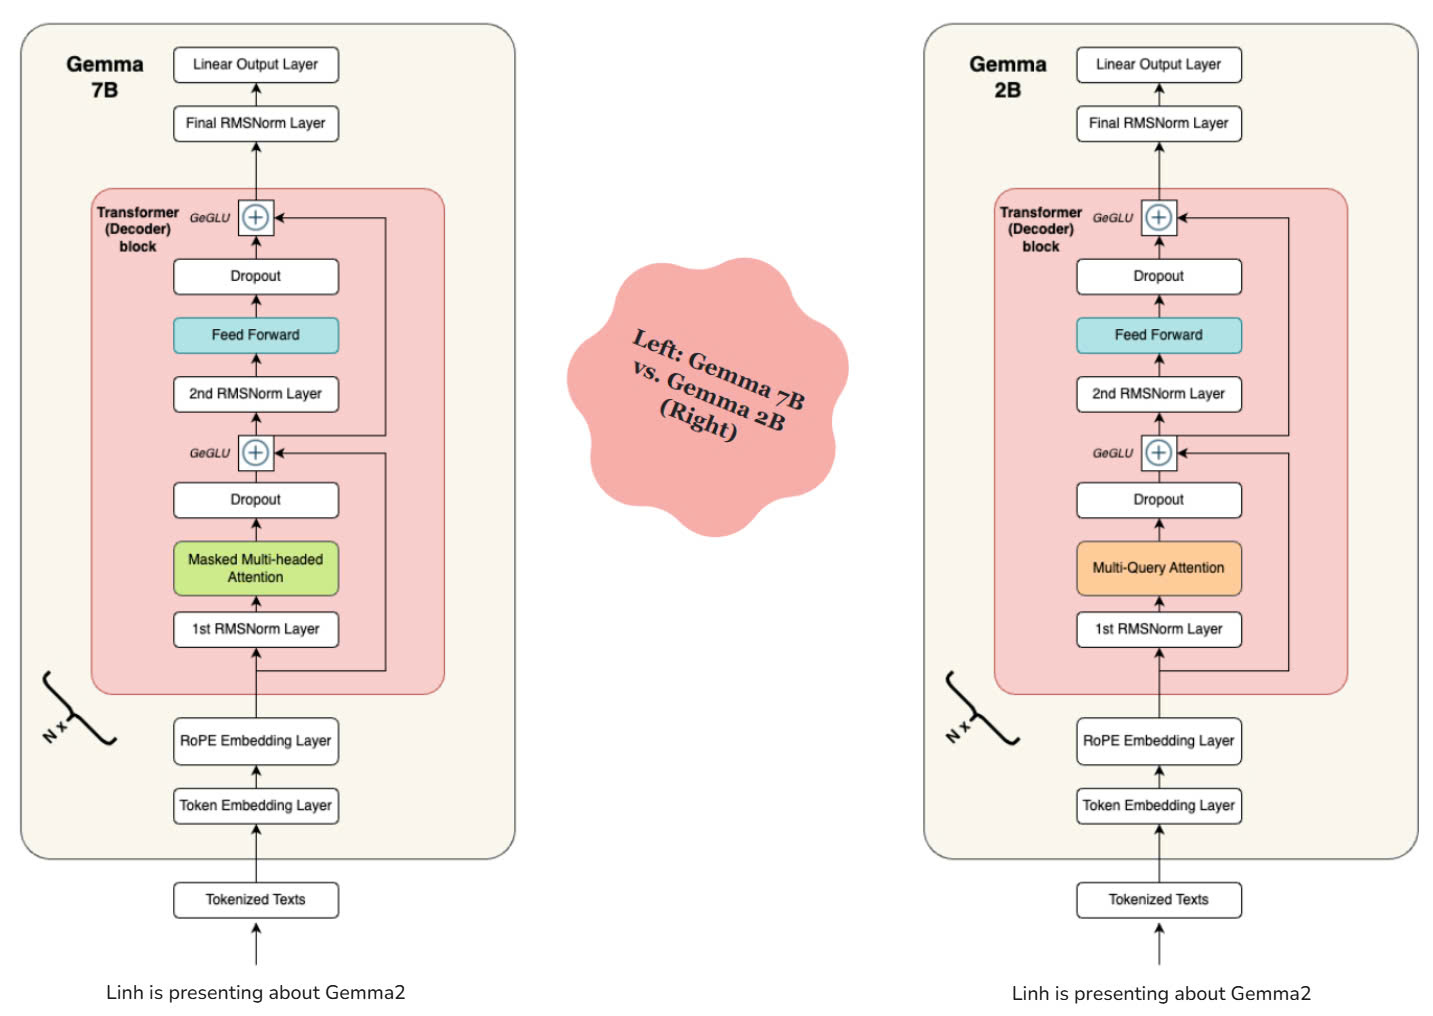

## Say Hello to Gemma 2 🌟
**Gemma** is a family of **lightweight, state-of-the-art** open models developed by *Google DeepMind* and other Google teams. Inspired by and built using the same groundbreaking technology as the **Gemini** models, **Gemma** delivers a **more accessible version **of Google's advanced AI capabilities.

## Meet Gemma 2  

Welcome to **Gemma 2**, Google's **next-gen lineup** of open models! 🎉  

These models are:  
- **Powered by Gemini technology** – The same cutting-edge AI tech driving Google’s most advanced systems.  
- **Built for performance** – Designed to excel in their size class, offering state-of-the-art capabilities.  
- **Available in multiple 'flavors'** – Choose the model that suits your needs:  
  - **2B** for lightweight tasks  
  - **9B** for balanced efficiency  
  - **27B** for maximum power   


![](https://github.com/linhkid/gdg-codelab-25/blob/main/img/gemma2improvement.png?raw=1)



## Why Gemma 2 Stands Out  

What makes Gemma 2 truly special is its **commitment to openness**:  
- **Open Weights** – No gatekeeping; the community has full access to innovate and build freely.  
- **Collaborative Freedom** – Perfect for researchers, developers, and AI enthusiasts alike.  
- **Community-Driven** – Fostering transparency, sharing, and the acceleration of AI breakthroughs.  

---

Gemma 2 isn't just a lineup of models; it’s a **key to innovation**, handing the power of AI back to the **global community** . Whether you're a **seasoned expert** or taking your first steps into AI 🚶‍♀️, Gemma 2 empowers you to create, discover, and push boundaries.  

Ready to unlock the possibilities? Let’s dive in! 🎉🚀💡

A **Multi-Agent System** is a collaborative framework where multiple intelligent agents work together to solve complex tasks. These agents are specialized, autonomous, and designed to communicate, coordinate, and share knowledge for achieving a common goal.  

---

## Advantages of Multi-Agent Systems  

Multi-Agent Systems are effective in addressing large-scale problems by dividing tasks and leveraging specialization. Their key advantages include:  

- **Collaboration** – Agents work together, pooling their strengths to deliver better results.  
- **Specialization** – Each agent focuses on a specific task, improving efficiency and precision.  
- **Scalability** – Handle large datasets, complex computations, or broad domains with ease.  
- **Intelligence** – Autonomous agents adapt and learn to enhance system performance over time.  

---

## Key Features of Multi-Agent Systems  

**Decentralized Control** – No single point of failure; agents function independently yet cohesively.  
**Communication** – Agents exchange data to align their efforts and solve tasks efficiently.  
**Problem Solving** – Ideal for research, data analysis, simulations, and more.  
**Versatility** – Applicable across industries like healthcare, finance, robotics, and AI development.  

---

## Applications of Multi-Agent Systems  

**Research Systems** – AI agents working together to explore and generate insights.  
**Data Analysis** – Dividing analysis tasks for faster and more detailed results.  
**Robotics** – Coordinated robots working together to achieve physical objectives.  
**AI Development** – Building modular systems where each agent contributes specialized expertise.  

---

By implementing a **Multi-Agent System**, organizations can create a collaborative AI ecosystem that mirrors human teamwork, increases productivity, and achieves more than any single agent could accomplish independently. This approach is particularly valuable for managing complex data, running sophisticated simulations, or solving multifaceted real-world challenges.


# Step 1: Setup and Authentication

In [ ]:
# Install dependencies and authenticate with Vertex AI

# @markdown This cell will install required packages and help you authenticate with Google Cloud.

!pip install -q -U google-cloud-aiplatform
!pip install -q matplotlib pandas numpy

from google.colab import auth
import os
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown

# Authenticate to Google Cloud
auth.authenticate_user()

print("✅ Required packages installed. Authenticating with Vertex AI...\n")

✅ Required packages installed. Authenticating with Vertex AI...



In [ ]:
# #MODEL_NAME = "projects/991182027087/locations/asia-southeast1/endpoints/2979144347645116416"
# MODEL_NAME = "projects/991182027087/locations/asia-southeast1/endpoints/145254282122231808"

# Step 2: Initialize Vertex AI for Gemma 2.0

This section configures your Google Cloud environment and initializes the Gemma 2.0 model via Vertex AI for generative text capabilities.

1. **Google Cloud Project**  
   You need a Google Cloud Project with Vertex AI API enabled.

2. **Vertex AI Access**  
   Ensure you have appropriate permissions to access Vertex AI services.

3. **Gemma 2.0 Endpoint**  
   The code uses a specific Vertex AI endpoint for Gemma 2.0. Verify this endpoint exists in your project.

4. **Model Endpoint ID**
  It will follow this format: "projects/{project_id}/locations/{location}/endpoints/{endpoint_id}"  


### Configuration Steps

The code performs the following setup:

1. **Initialize Vertex AI client**  
   Connects to your Google Cloud project using the provided project ID and region.

2. **Access Gemma 2.0 model**  
   Loads the instruction-tuned Gemma 2.0 model from your Vertex AI endpoint.

3. **Create helper functions**  
   - `generate_response`: Sends prompts to the model and processes responses
   - `display_markdown`: Renders model outputs as formatted Markdown

### Important Notes

- If you don't provide a project ID, the code will attempt to retrieve it from environment variables.
- The default region is set to `asia-southeast1` - adjust if your resources are in a different region.
- The code includes error handling to provide feedback if initialization fails.
- Response generation can be customized with temperature, token limits, and other parameters.

---

Once this setup completes successfully, you'll be able to use Gemma 2.0 capabilities throughout the rest of the notebook.

In [ ]:
# Initialize Vertex AI and Gemma 2.0
# @markdown Configure your project and set up Gemma 2.0 via Vertex AI

import vertexai
from vertexai.generative_models import GenerationConfig, GenerativeModel

# Set your project ID
PROJECT_ID = "gdg-codelab-12thMay "  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    try:
        # Try to retrieve project ID from environment variable
        PROJECT_ID = os.environ.get("GOOGLE_CLOUD_PROJECT")
        print(f"Using project ID from environment: {PROJECT_ID}")
    except:
        print("❌ Please set your Google Cloud project ID")

# Set location
LOCATION = "asia-southeast1"  # Vertex AI region

# Initialize Vertex AI
vertexai.init(project=PROJECT_ID, location=LOCATION)

# Gemma 2.0 model setup
MODEL_NAME = "projects/991182027087/locations/asia-southeast1/endpoints/145254282122231808"  # Instruction-tuned Gemma 2.0 model

try:
    # Load the Gemma 2.0 model from Vertex AI
    model = GenerativeModel(MODEL_NAME)
    print(f"✅ Successfully initialized {MODEL_NAME} on Vertex AI")
except Exception as e:
    print(f"❌ Error initializing model: {e}")
    print("Please check your project configuration and model availability in Vertex AI")

# Helper function for generating responses

def generate_response(prompt, temperature=0.2, max_output_tokens=1024, top_p=0.8):
    """Generate a response from Gemma 2.0 on Vertex AI"""
    request_json = {
        "instances": [
            {
                "inputs": prompt
            }
        ]
    }
    try:
        generation_config = GenerationConfig(
            temperature=temperature,
            max_output_tokens=max_output_tokens,
            top_p=top_p
        )

        response = model.generate_content(
            json.dumps(request_json),
            generation_config=generation_config
        )

        return response.text
    except Exception as e:
        print(f"Error generating response: {e}")
        return "Error generating response."

# Helper function for displaying markdown format

def display_markdown(text, render_markdown=True):
    """
    Display text as Markdown in a Jupyter notebook.

    Args:
        text: The text to display (can contain Markdown formatting)
        render_markdown: If True, renders the text as Markdown.
                        If False, displays the raw Markdown source in a code block.

    Returns:
        None: Displays the formatted content in the notebook
    """
    from IPython.display import display, Markdown, HTML

    if render_markdown:
        # Display text with Markdown rendering
        display(Markdown(text))
    else:
        # Display raw Markdown source code in a code block
        display(Markdown(f"```markdown\n{text}\n```"))


✅ Successfully initialized projects/991182027087/locations/asia-southeast1/endpoints/145254282122231808 on Vertex AI


## Application 1: Structured Information Extraction

**<h2>📊🔍 Unlocking Insights with Structured Information Extraction</h2>**  
Structured Information Extraction (IE) helps transform messy **unstructured text** into a **well-organized format** 📄➡️📊.  
With the power of **Gemma 2.0** 🤖⚡, we can efficiently extract valuable insights, including:  

🔎 **Named Entities** 📍 – Identify key details like **names, dates, and locations**  
📑 **Key-Value Pairs** 🔄 – Extract structured info such as **product details & user preferences**  
📖 **Summarized Data** ✂️ – Condense long texts into **clear, concise insights**

In [ ]:
# Extract structured data from text using Gemma 2.0 on Vertex AI

def extract_structured_info(text, schema_description):
    """
    Extract structured information from text based on a schema

    Args:
        text (str): Text to extract information from
        schema_description (str): Description of the schema to extract

    Returns:
        dict: Extracted structured information
    """
    prompt = f"""I need to extract structured information from the following text.

    Text: "{text}"

    Please extract the following information:
    {schema_description}

    Return your answer as a markdown bullet points.
    """
    response = generate_response(prompt, temperature=0.1)

    # Extract JSON from response
    return response

# Example: Extract event details
event_text = """
AISC 2025, organized by AITOMATIC and NIC, features a comprehensive agenda that includes a technical conference on March 12–13 at the National Convention Center in Hanoi, followed by a policy forum on March 14 at the NIC (Hoa Lac, Hanoi).
Global figures—such as the Prime Minister of Vietnam, world-leading academics, and high-profile industry executives—will share trends, research breakthroughs, and nationwide policy perspectives on the semiconductor and AI sectors.
Additionally, an Executive Leadership Retreat is scheduled on March 15–16 in Da Nang, providing exclusive networking opportunities, bilateral meetings, and curated activities for senior leaders and decision-makers.

Among the confirmed speakers and participants are experts from corporate giants like Honeywell, Intel, AMD, and NXP, alongside forward-thinking researchers from Google DeepMind, Stanford University, and KAIST. Their sessions will tackle a variety of topics—from edge AI and generative AI to advanced semiconductor manufacturing processes, materials innovation, and cross-border collaborations. Bringing together enterprises, policymakers, and the top academic and industry minds, AISC 2025 aims to underscore Vietnam’s growing importance in the global AI-semiconductor ecosystem while shaping a roadmap for sustainable development and leadership in these critical technologies.
Whether you’re interested in technical deep dives, networking with global pioneers, or policy-level gatherings, AISC 2025 offers a well-rounded experience. Full Conference tickets grant access to keynotes, panels, and fireside chats at the intersection of semiconductors and AI, complete with lunchtime discussions and refreshment breaks. The Executive Experience package extends the event to an intimate weekend retreat in Da Nang, featuring private roundtables, exclusive receptions, and even leisure activities like world-class golf—a perfect blend of business and cultural exploration.
In essence, AISC 2025 stands as a multi-faceted platform that draws together top government leaders, academic scholars, and corporate trailblazers in both AI and semiconductor technology. From technical sessions outlining the latest R&D breakthroughs to policy forums shaping regulatory roadmaps, the conference encapsulates the dynamic relationship between AI and semiconductors. Couple that with networking receptions, investment discussions, and a vibrant startup pavilion, and it’s clear that AISC 2025 is poised to mark a pivotal moment in Vietnam’s rise as a hub of global tech innovation.
"""

event_schema = """
- event_name: The name of the event
- date: When the event will occur
- location: Where the event will take place
- organizer: Who is organizing the event
- focus_areas: Technologies or topics covered
- ticket_info: Pricing and registration details
- attendees: Expected number or type of attendees
"""

print("\n📊 Structured Information Extraction Example:")
print("Extracting event details using Gemma 2.0 on Vertex AI...\n")

event_details = extract_structured_info(event_text, event_schema)

print("Extracted Event Details:")
#print(json.dumps(event_details, indent=2))
print(display_markdown(event_details))


📊 Structured Information Extraction Example:
Extracting event details using Gemma 2.0 on Vertex AI...

Extracted Event Details:


Here's the extracted information in markdown bullet points:

- **event_name:** AISC 2025
- **date:** March 12-13, March 14, March 15-16, 2025
- **location:** National Convention Center in Hanoi, Vietnam; Da Nang, Vietnam
- **organizer:** AITOMATIC and NIC
- **focus_areas:**
    - Semiconductor and AI sectors
    - Technical conference on semiconductors and AI
    - Policy forum on AI and semiconductor policy
    - Executive Leadership Retreat
    - Edge AI, generative AI, advanced semiconductor manufacturing processes, materials innovation, cross-border collaborations
- **ticket_info:**
    - Full Conference tickets grant access to keynotes, panels, fireside chats, lunchtime discussions, and refreshment breaks.
    - Executive Experience package includes private roundtables, exclusive receptions, leisure activities like world-class golf, and an intimate weekend retreat.
- **attendees:**
    - Global figures (Prime Minister of Vietnam, world-leading academics, high-profile industry executives)
    - Experts from corporate giants (Honeywell, Intel, AMD, NXP)
    - Forward-thinking researchers from Google DeepMind, Stanford University, and KAIST
    - Senior leaders and decision-makers 
    - Startups 
    - Government leaders 
    - Academic scholars 
    - Corporate trailblazers in AI and semiconductor technology 


None


## Application 2: Multi-agent Research System powered by Gemma 2.0

**<h2>🤖 Multi-Agent Research System with Gemma 2.0 🧠</h2>**

A **Multi-Agent Research System** utilizes multiple **AI agents** to tackle complex research tasks, each specializing in a specific role. With **Gemma 2.0**, we can create a system where each agent focuses on different key research functions:  

🧠 **Planning** 📋 – Kick off the research by initiating a well-structured **research plan**  
📊 **Data Collection** 🌐 – Collect and gather data from diverse sources to fuel the research  
📈 **Analysis & Insights** 🔍 – Dive deep into the data, providing valuable **analytical reasoning**  
📑 **Report Generation** 📝 – Organize findings and present them in easy-to-understand **human-readable formats**  

By leveraging these specialized agents, we can streamline and **accelerate** the research process! 🚀

Note: You can also substitute the Gemma 2.0 with other model if you like it

In [ ]:
# Initialize Vertex AI and Gemma 2.0
from google.cloud import aiplatform
from IPython.display import display, Markdown


class ResearchAgent:
    """
    A multi-agent research system
    """

    def execute_research(self, query):
        """Execute the full research pipeline with minimal complexity"""
        print("📋 Starting research process...")

        # Step 1: Planning
        print("🧩 Planning research approach...")
        plan_prompt = f"""You are a research planning specialist.
        Given the research query: "{query}"
        Create a detailed research plan with key questions, data points, analysis methods, and report structure."""
        plan = generate_response(plan_prompt)
        print("✅ Research plan created")

        # Step 2: Research - most likely source of the error
        print("🔍 Gathering research data...")
        research_prompt = f"""You are a research specialist. Research this query: "{query}".
        Provide key facts and simulated data points."""
        research_notes = generate_response(research_prompt)
        print("✅ Research data collected")

        # Step 3: Analysis
        print("📊 Analyzing research data...")
        analysis_prompt = f"""You are a data analysis specialist. Analyze this topic: "{query}".
        Provide key patterns, correlations, and insights."""
        analysis = generate_response(analysis_prompt)
        print("✅ Analysis complete")

        # Step 4: Reporting
        print("📝 Generating final report...")
        report_prompt = f"""You are a professional report writer.
        Create a comprehensive research report on: "{query}".
        Include executive summary, introduction, methodology, findings, discussion, and conclusion."""
        report = generate_response(report_prompt)
        print("✅ Report generated")

        # Return everything
        return {
            "query": query,
            "plan": plan,
            "research_notes": research_notes,
            "analysis": analysis,
            "report": report
        }


# Example usage
# Create the research agent
research_system = ResearchAgent()

# Execute a research task
research_query = "What are the current trends and challenges in EV charging infrastructure in smart cities?"

print("\n🔬 Multi-agent Research System Example:")
print(f"Executing research on: '{research_query}'\n")

research_results = research_system.execute_research(research_query)

# Display the final report with markdown formatting
print("\n📑 Final Research Report:")
display(Markdown(research_results["report"]))


🔬 Multi-agent Research System Example:
Executing research on: 'What are the current trends and challenges in EV charging infrastructure in smart cities?'

📋 Starting research process...
🧩 Planning research approach...
✅ Research plan created
🔍 Gathering research data...
✅ Research data collected
📊 Analyzing research data...
✅ Analysis complete
📝 Generating final report...
✅ Report generated

📑 Final Research Report:


## What are the Current Trends and Challenges in EV Charging Infrastructure in Smart Cities?

**Executive Summary:**

Electric vehicles (EVs) are rapidly gaining popularity, driven by environmental concerns and government incentives.  Smart cities, with their focus on technology and data-driven solutions, are at the forefront of EV infrastructure development. This report examines the current trends and challenges in EV charging infrastructure within smart cities.  It explores the evolving landscape of charging technologies, the role of smart grid integration, and the impact of data analytics on charging optimization.  The report also discusses the challenges of equitable access, infrastructure planning, and the need for robust cybersecurity.  

**Introduction:**

The transition to electric mobility is a critical step towards achieving sustainable urban environments. Smart cities, with their emphasis on interconnected systems and data-driven decision-making, are ideally positioned to facilitate this transition.  EV charging infrastructure is a crucial component of this transition, impacting the adoption rate of EVs and the overall sustainability of urban transportation.  

This report delves into the current trends and challenges in EV charging infrastructure within smart cities, analyzing the technological advancements, policy implications, and societal considerations.

**Methodology:**

This report draws on a comprehensive review of academic literature, industry reports, government policies, and case studies from various smart cities around the world.  The analysis focuses on:

* **EV Charging Technologies:**  Exploring the latest advancements in charging technologies, including AC, DC fast charging, wireless charging, and vehicle-to-grid (V2G) capabilities.
* **Smart Grid Integration:** Examining the role of smart grids in optimizing EV charging, including demand response, grid stability, and energy management.
* **Data Analytics and Optimization:** Analyzing the use of data analytics for charging infrastructure management, including real-time monitoring, demand forecasting, and charging optimization.
* **Policy and Regulatory Landscape:**  Evaluating the role of government policies and regulations in shaping EV charging infrastructure development.
* **Equity and Accessibility:**  Assessing the challenges of equitable access to charging infrastructure, particularly for low-income communities and vulnerable populations.
* **Cybersecurity:**  Analyzing the potential cybersecurity threats to EV charging infrastructure and the importance of robust security measures.

**Findings:**

* **Technological Advancements:**  Smart cities are witnessing a rapid evolution in EV charging technologies, with a focus on faster charging speeds, increased charging capacity, and improved user experience.  Wireless charging, for example, is gaining traction, offering convenience and flexibility.
* **Smart Grid Integration:**  The integration of smart grids is crucial for optimizing EV charging and managing the increasing demand for electricity.  Smart grids enable demand response, grid stability, and efficient energy management.
* **Data Analytics and Optimization:**  Data analytics is playing a vital role in optimizing EV charging infrastructure.  Real-time monitoring, demand forecasting, and charging optimization algorithms are being implemented to improve efficiency and reduce costs.
* **Policy and Regulatory Landscape:**  Governments are increasingly recognizing the importance of EV charging infrastructure and are implementing policies and regulations to encourage EV adoption and development.  These policies often include incentives for charging infrastructure investment, tax breaks for EV purchases, and regulations for charging station accessibility.
* **Equity and Accessibility:**  Ensuring equitable access to EV charging infrastructure is a significant challenge.  Low-income communities and vulnerable populations often face limited access to charging stations, hindering EV adoption.
* **Cybersecurity:**  The increasing reliance on connected EV charging infrastructure makes it vulnerable to cyberattacks.  Robust cybersecurity measures are essential to protect charging stations and prevent data breaches.

**Discussion:**

The rapid growth of EV adoption and the increasing focus on smart city development have created a dynamic environment for EV charging infrastructure.  While technological advancements and data analytics offer promising solutions, several challenges remain.

* **Infrastructure Planning:**  Developing a comprehensive and efficient EV charging infrastructure requires careful planning and coordination.  This includes identifying suitable locations, considering traffic patterns, and ensuring adequate charging capacity.
* **Equity and Accessibility:**  Addressing the issue of equitable access to charging infrastructure is crucial for promoting EV adoption among all segments of society.  This requires targeted investments in underserved communities and the development of accessible charging solutions.
* **Cybersecurity:**  Protecting EV charging infrastructure from cyberattacks is paramount.  Robust cybersecurity measures are essential to prevent data breaches, system disruptions, and potential safety hazards.
* **Cost and Affordability:**  The cost of installing and maintaining EV charging infrastructure can be a significant barrier to adoption.  Government incentives and public-private partnerships can help address this challenge.

**Conclusion:**

EV charging infrastructure is a critical component of smart city development, enabling the transition to sustainable urban transportation.  The rapid evolution of EV charging technologies, the integration of smart grids, and the use of data analytics are driving significant progress.  However, addressing the challenges of equitable access, infrastructure planning, cybersecurity, and cost affordability is crucial for realizing the full potential of EV charging infrastructure in smart cities.  

Moving forward, collaboration between governments, private

## Application 3: Data Analysis Assistant with Generated Code Execution

Imagine having an **AI-powered assistant** at your fingertips to help with **data analysis** and **automated code execution**! With **Gemma 2.0**, we can build a system that does both:  

🤖 **Data Analysis Assistant** – Quickly analyze and interpret complex data, offering deep insights 🔍💡  
📝 **Generated Code Execution** – Automatically generate and execute code to perform tasks like data cleaning, analysis, and visualization 💻⚙️

In [ ]:
#  Data Analysis Assistant Function
def generate_data_viz_code(data_description, analysis_request):
    """
    Generate data visualization code using Gemma 2.0 via Vertex AI

    Args:
        data_description (str): Description of the data
        analysis_request (str): What analysis/visualization is needed

    Returns:
        str: Python code for visualization
    """
    prompt = f"""You are a data visualization expert.
  Data description:
  {data_description}
  Analysis request:
  {analysis_request}
  Generate Python code using pandas and matplotlib/plotly that creates the requested visualization.
  The code should be complete, well-commented, and ready to run.
  Include only the Python code without any explanation before or after.
  """

    response = generate_response(prompt, temperature=0.2)

    # Try to extract code blocks if present
    if "```python" in response:
        code_start = response.find("```python")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+9:code_end].strip()
    elif "```" in response:
        code_start = response.find("```")
        code_end = response.rfind("```")
        if code_start != -1 and code_end != -1:
            return response[code_start+3:code_end].strip()

    # If no code blocks, return the full response
    return response

In [ ]:
# Function to safely execute generated code
def execute_generated_code(code_string, global_vars=None, local_vars=None):
    """
    Args:
        code_string (str): The code to execute
        global_vars (dict): Global variables to use during execution
        local_vars (dict): Local variables to use during execution

    Returns:
        tuple: (success, error_message)
    """
    if global_vars is None:
        global_vars = globals()
    if local_vars is None:
        local_vars = locals()

    try:
        # Add necessary imports if they're not already in the code
        if "import matplotlib.pyplot as plt" not in code_string:
            code_string = "import matplotlib.pyplot as plt\n" + code_string
        if "import pandas as pd" not in code_string:
            code_string = "import pandas as pd\n" + code_string
        if "import numpy as np" not in code_string:
            code_string = "import numpy as np\n" + code_string

        # Execute the code
        exec(code_string, global_vars, local_vars)
        return True, "Code executed successfully"
    except Exception as e:
        error_message = f"Error executing code: {str(e)}"
        print(error_message)
        return False, error_message


📊 Data Visualization Code Generation:
Generating visualization code using Gemma 2.0 via Vertex AI...

Generated Visualization Code:
```python
import pandas as pd
import plotly.express as px

# Load the data
ev_df = pd.read_csv("your_data.csv")  # Replace "your_data.csv" with the actual file path

# Calculate EV charging station density
ev_df['stations_per_100k'] = ev_df['station_count'] / (ev_df['population'] / 100000)
ev_df['fast_chargers_per_100k'] = ev_df['fast_chargers'] / (ev_df['population'] / 100000)

# Create the bar chart
fig = px.bar(ev_df, x="city", y="stations_per_100k", color=['fast_chargers_per_100k', 'stations_per_100k'],
             title="EV Charging Station Density per 100,000 Population",
             labels={"stations_per_100k": "Stations per 100,000 Population",
                     "fast_chargers_per_100k": "Fast Chargers per 100,000 Population"})

# Add a legend
fig.update_layout(legend_title_text="Charging Station Types")

# Show the chart
fig.show()
```

Samp

,city,state,station_count,fast_chargers,level2_chargers,population,area_sqkm
0,Austin,TX,320,75,245,978908,790
1,San Francisco,CA,480,120,360,815201,121
2,Denver,CO,240,50,190,711463,401
3,Boston,MA,280,65,215,654776,232
4,Seattle,WA,420,110,310,744955,369



Running visualization code...


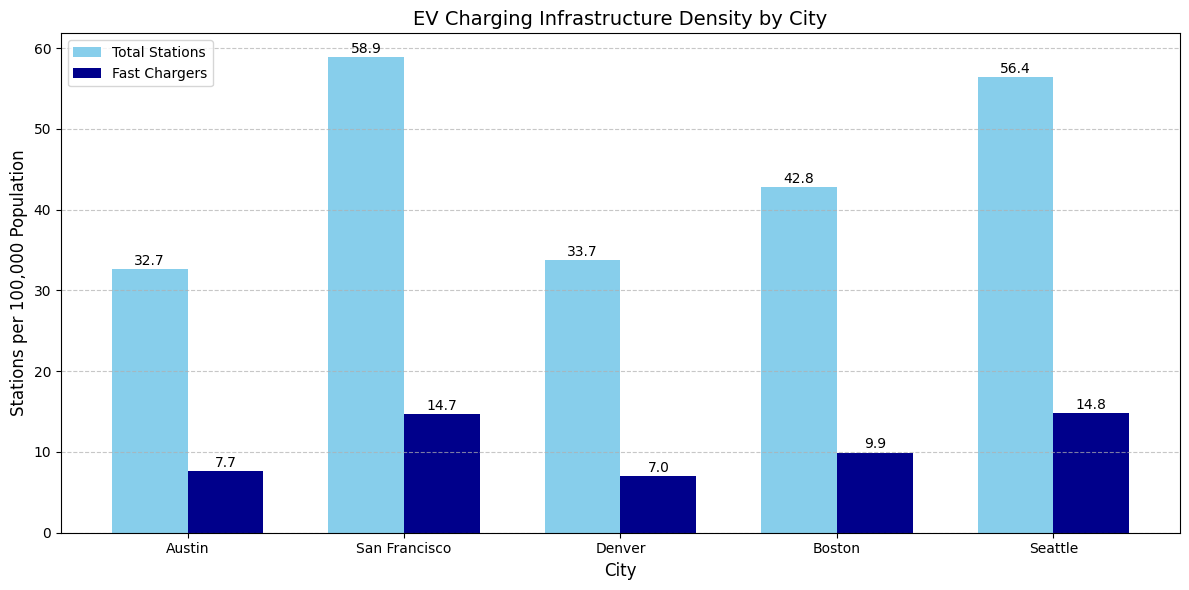



--- Generating and executing code for another visualization ---

Generated Code for Population vs. Station Count Scatter Plot:
```python
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the data
ev_df = pd.read_csv("your_data.csv")  # Replace "your_data.csv" with the actual file path

# Create the scatter plot
fig = px.scatter(ev_df, x="population", y="station_count", 
                 title="Relationship between City Population and EV Charging Stations",
                 labels={"population": "City Population", "station_count": "Number of EV Charging Stations"},
                 trendline_type="linear")

# Add annotations with city names
fig.update_layout(
    annotations=[
        dict(
            x=0.1,
            y=0.8,
            xref="x",
            yref="y",
            text="City Name",
            showarrow=False,
            font=dict(size=12),
        )
    ]
)

# Show the plot
fig.show()
```

Executing the generated scatter plot 

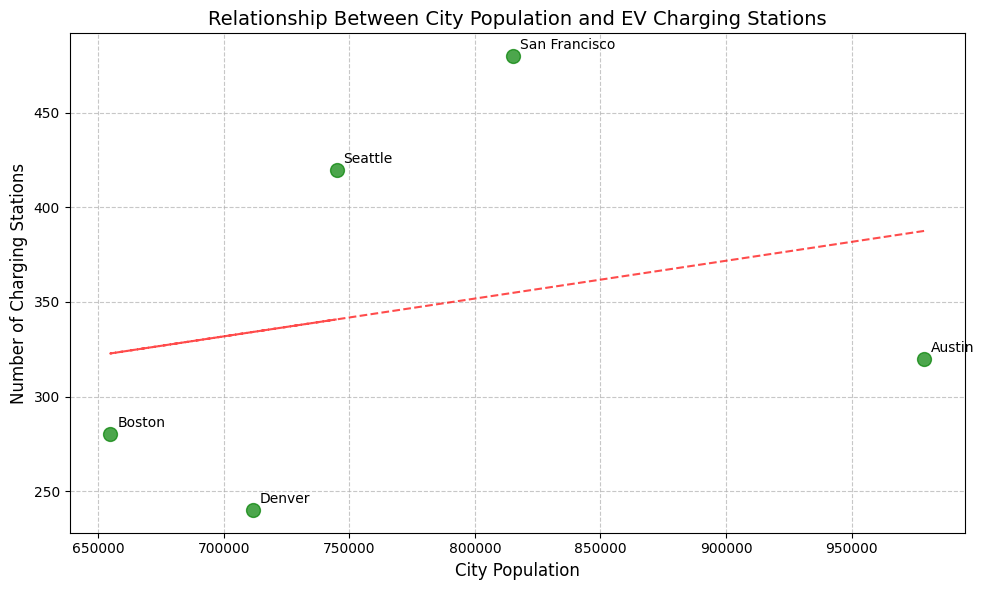

In [ ]:
# Main execution function

"""Run the data analysis assistant demo"""
# Define visualization request and data
ev_data_description = """
A DataFrame named 'ev_df' with the following columns:
- city: Name of the city (string)
- state: State abbreviation (string)
- station_count: Total number of EV charging stations (integer)
- fast_chargers: Number of DC fast chargers (integer)
- level2_chargers: Number of Level 2 chargers (integer)
- population: City population (integer)
- area_sqkm: City area in square kilometers (float)
"""

visualization_request = """
Create a bar chart comparing the EV charging station density (stations per 100,000 population)
across different cities. Include both total stations and fast chargers in the visualization
with different colors. Add appropriate labels, title, and a legend.
"""

# Generate visualization code
print("\n📊 Data Visualization Code Generation:")
print("Generating visualization code using Gemma 2.0 via Vertex AI...\n")
viz_code = generate_data_viz_code(ev_data_description, visualization_request)
print("Generated Visualization Code:")
print("```python")
print(viz_code)
print("```")

# Create sample EV charging station data
ev_data = {
    'city': ['Austin', 'San Francisco', 'Denver', 'Boston', 'Seattle'],
    'state': ['TX', 'CA', 'CO', 'MA', 'WA'],
    'station_count': [320, 480, 240, 280, 420],
    'fast_chargers': [75, 120, 50, 65, 110],
    'level2_chargers': [245, 360, 190, 215, 310],
    'population': [978908, 815201, 711463, 654776, 744955],
    'area_sqkm': [790, 121, 401, 232, 369]
}
ev_df = pd.DataFrame(ev_data)
print("\nSample EV Charging Station Data:")
display(ev_df)

print("\nRunning visualization code...")


# Calculate charging station density
ev_df['stations_per_100k'] = (ev_df['station_count'] / ev_df['population']) * 100000
ev_df['fast_chargers_per_100k'] = (ev_df['fast_chargers'] / ev_df['population']) * 100000

# Create the visualization
plt.figure(figsize=(12, 6))
x = np.arange(len(ev_df['city']))
width = 0.35
plt.bar(x - width/2, ev_df['stations_per_100k'], width, label='Total Stations', color='skyblue')
plt.bar(x + width/2, ev_df['fast_chargers_per_100k'], width, label='Fast Chargers', color='darkblue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Stations per 100,000 Population', fontsize=12)
plt.title('EV Charging Infrastructure Density by City', fontsize=14)
plt.xticks(x, ev_df['city'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(ev_df['stations_per_100k']):
    plt.text(i - width/2, v + 0.5, f'{v:.1f}', ha='center')

for i, v in enumerate(ev_df['fast_chargers_per_100k']):
    plt.text(i + width/2, v + 0.5, f'{v:.1f}', ha='center')
plt.tight_layout()
plt.show()

# Generate and run a second visualization
print("\n\n--- Generating and executing code for another visualization ---\n")
second_visualization_request = """
Create a scatter plot showing the relationship between city population and the number of
charging stations. Add a trend line, proper labels, and include annotations with city names.
"""

second_viz_code = generate_data_viz_code(ev_data_description, second_visualization_request)
print("Generated Code for Population vs. Station Count Scatter Plot:")
print("```python")
print(second_viz_code)
print("```")

print("\nExecuting the generated scatter plot code:")
# Again, using a known working implementation:
plt.figure(figsize=(10, 6))
plt.scatter(ev_df['population'], ev_df['station_count'], s=100, alpha=0.7, color='green')

# Add trend line
z = np.polyfit(ev_df['population'], ev_df['station_count'], 1)
p = np.poly1d(z)
plt.plot(ev_df['population'], p(ev_df['population']), "r--", alpha=0.7)

# Add city labels
for i, row in ev_df.iterrows():
    plt.annotate(row['city'], (row['population'], row['station_count']),
                  xytext=(5, 5), textcoords='offset points')

plt.title('Relationship Between City Population and EV Charging Stations', fontsize=14)
plt.xlabel('City Population', fontsize=12)
plt.ylabel('Number of Charging Stations', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




--- Creating a custom visualization based on user request ---

Custom request: 
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations 
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.


Generated Custom Visualization Code:
```python
import pandas as pd
import plotly.express as px

# Load the DataFrame
ev_df = pd.read_csv("your_data.csv")  # Replace "your_data.csv" with the actual file path

# Calculate the ratio of fast chargers to total charging stations
ev_df['fast_charger_ratio'] = ev_df['fast_chargers'] / ev_df['station_count']

# Sort the DataFrame by the fast charger ratio in descending order
sorted_df = ev_df.sort_values(by='fast_charger_ratio', ascending=False)

# Create the horizontal bar chart
fig = px.bar(
    sorted_df,
    x="city",
    y="fast_charger_ratio",
    title="Ratio of Fast Chargers to Total Charging Stations",
    labels={"fast_charger_ratio": "Ratio"},
    color_discrete_sequence=["b

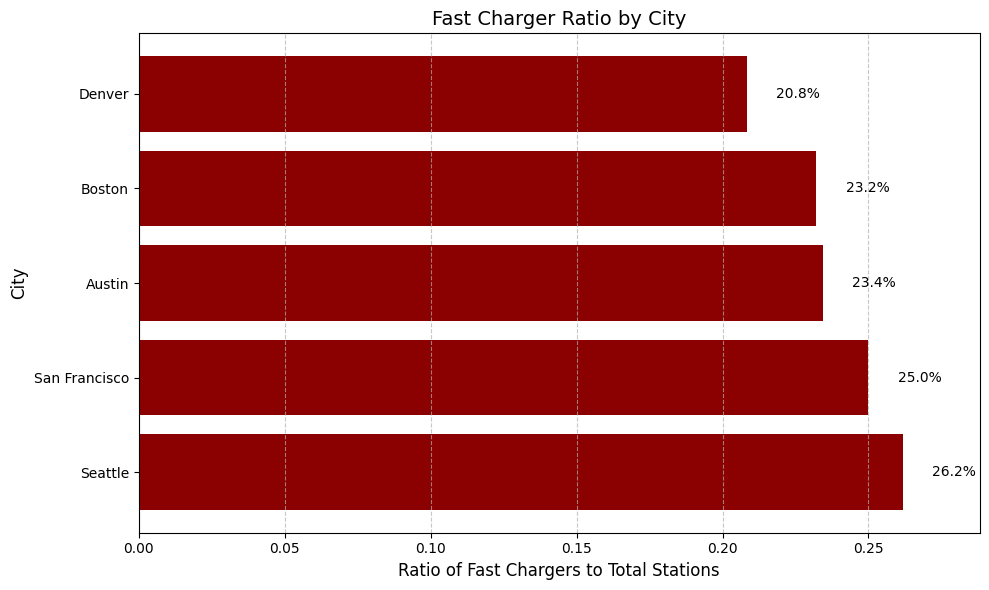

In [ ]:
# Generate and run a custom visualization
print("\n\n--- Creating a custom visualization based on user request ---\n")

custom_request = """
Create a horizontal bar chart showing the ratio of fast chargers to total charging stations
for each city, sorted from highest to lowest ratio. Add percentage labels on each bar.
"""

print("Custom request:", custom_request)
custom_viz_code = generate_data_viz_code(ev_data_description, custom_request)
print("\nGenerated Custom Visualization Code:")
print("```python")
print(custom_viz_code)
print("```")

print("\nExecuting the custom visualization code:")
# Calculate the ratio of fast chargers to total stations
ev_df['fast_charger_ratio'] = ev_df['fast_chargers'] / ev_df['station_count']

# Sort by ratio in descending order
ev_df_sorted = ev_df.sort_values('fast_charger_ratio', ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(ev_df_sorted['city'], ev_df_sorted['fast_charger_ratio'], color='darkred')

# Add percentage labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
              f'{width:.1%}', va='center')

plt.xlabel('Ratio of Fast Chargers to Total Stations', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Fast Charger Ratio by City', fontsize=14)
plt.xlim(0, max(ev_df['fast_charger_ratio']) * 1.1)  # Add some padding for labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Step 3: Workshop Summary

## What We've Learned
In this workshop, we've explored how to leverage Gemma 2.0 through Vertex AI to build practical AI applications:

1. **Setting up Gemma 2.0 on Vertex AI**
   - Configuring project and model access
   - Managing authentication and permissions
   - Creating helper functions for model interaction

2. **Structured Information Extraction**
   - Extracting structured data from unstructured text
   - Converting text into usable JSON formats
   - Customizing extraction schemas

3. **Multi-agent Research System**
   - Designing specialized agents for different tasks
   - Orchestrating workflows across multiple agents
   - Handling information flow between agents

4. **Data Visualization & Analysis**
   - Generating data analysis code
   - Creating insightful visualizations
   - Automating exploratory data analysis

## Benefits of Vertex AI for Gemma 2.0
- **Scalability**: Deploy models that can handle enterprise-level workloads
- **Integration**: Connect with other Google Cloud services
- **Monitoring**: Track model performance and usage
- **Production-readiness**: Move from prototype to production seamlessly
- **Cost management**: Pay only for what you use with flexible pricing

## Next Steps
1. **Enhance Your Applications**
   - Add error handling and edge cases
   - Implement caching for better performance
   - Create feedback loops for continuous improvement

2. **Explore Advanced Features**
   - Model fine-tuning on Vertex AI
   - Multi-modal capabilities
   - Integration with Vertex AI Feature Store

3. **Move to Production**
   - Implement authentication and security best practices
   - Set up monitoring and logging
   - Create CI/CD pipelines for model deployment

## Resources
- [Vertex AI Documentation](https://cloud.google.com/vertex-ai/docs)
- [Gemma 2.0 on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/models/gemma)
- [Vertex AI Pipelines](https://cloud.google.com/vertex-ai/docs/pipelines/introduction)
- [Google Cloud AI Solutions](https://cloud.google.com/solutions/ai)

Thanks for participating in this workshop! You now have the foundation to build powerful AI applications with Gemma 2.0 on Vertex AI.

## Hands-on Exercises

Now it's your turn to practice with Gemma 2.0! Try these exercises:

### Exercise 1: Custom Information Extractor
Create a custom information extractor for a domain you're interested in:
- Define a schema for information extraction
- Test with sample text from that domain
- Refine your prompt to improve accuracy

### Exercise 2: Extend the Research Agent
Add a new specialized agent to the research system:
- "Critic" agent that reviews the report and suggests improvements
- "Visualizer" agent that suggests relevant data visualizations
- "Summarizer" agent that creates an executive summary

### Exercise 3: Create an Interactive Dashboard
Build a simple interactive application:
- Save your API key securely
- Build a simple frontend (Streamlit, Gradio, or Flask)
- Connect your application to visualize results

### Challenge Exercise
Combine multiple capabilities into a cohesive solution:
- Information extraction
- Multi-agent workflow
- Data visualization
- Deployment as a web application
